# Tutorial 1: Linear Regression

### Imports

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data to be used

Explore the data is going to be used for this tutorial.

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

----------------------------------------------------------------------------------

Take the boston data

In [16]:
data = boston_data['data']
print(data.shape)

#data[Num. of training examples, Num. of attributes]

(506, 13)


In [17]:
# we will only work with two of the features: INDUS and RM
x_input = data[:, [2,5]]

#What we will want to predict
y_target = boston_data['target']

(506,)


### Visualize data

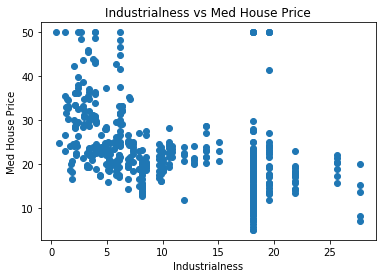

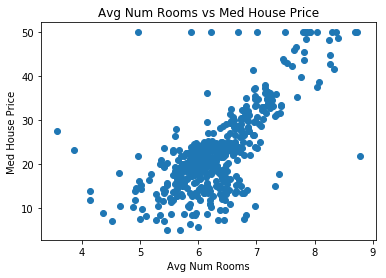

In [56]:
#Individual plots for the two features
plt.title('Industrialness vs Med House Price')
plt.scatter(x_input[:,0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

### Define cost function

Remember, the objective is to find the weights that minimize as much as possible a cost function.

\begin{equation*}
\varepsilon(y, t) = \frac{1}{2N} \sum_{i=1}^N (y^{(i)}-t^{(i)})^{2}
\end{equation*}

\begin{equation*}
{\varepsilon}(y, t) = \frac{1}{2N} \sum_{i=1}^N (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b -t^{(i)})^2
\end{equation*}

In [29]:
def cost(w1, w2, b, X, t):
    '''
    Non-vectorized form of cost given each of the inputs(x1 and x2), 
    '''
    cost = 0
    for i in range(len(t)):
        y_i = w1*X[i,0] + w2*X[i,1] + b
        t_i = t[i]
        costs = (y_i - t_i)**2
        cost += 0.5*costs/len(t)
    return cost

In [37]:
cost(3,5,20, x_input, y_target)

2241.123916674903

### Vectorizing the cost function

\begin{equation*}
\varepsilon(y, t) = \frac{1}{2N} \| \bf{X} \bf{w} + b \bf{1} - \bf{t} \| ^2
\end{equation*}

In [60]:
def cost_vectorized(X, w1, w2, b,T):
    W = [w1,w2]
    Y = np.dot(X,np.transpose(W)) + b
    
    cost = 0.5*(1/len(T))*(Y - T)**2
    return np.sum(cost)


In [61]:
w1 = 3
w2 = 5
cost_vectorized(x_input,w1,w2, 20, y_target)

2241.123916674901

### Comparing speed

In [69]:
import time
t0 = time.time()
print(cost(3,5,20, x_input, y_target))
time0 = time.time() - t0
print(time0)

2241.123916674903
0.0041484832763671875


In [70]:
t0 = time.time()
print(cost_vectorized(x_input,w1,w2, 20, y_target))
time1 = time.time() - t0
print(time1)

2241.123916674901
0.0009801387786865234


In [71]:
print('Vectorized form runs',time0/time1,'times faster than non-vectorized form!')

Vectorized form runs 4.232546825589881 times faster than non-vectorized form!


### Plotting cost in weight space

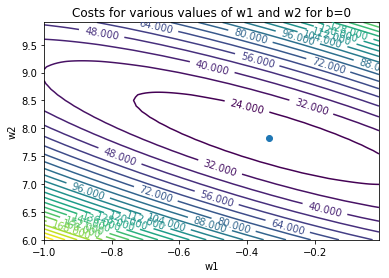

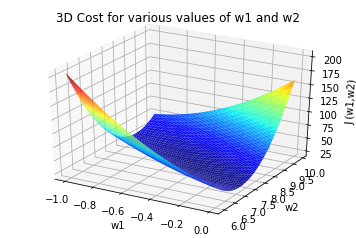

In [96]:
#Let's create a list of weights 
w1s = np.arange(-1.0, 0.0, 0.01)
w2s = np.arange(6.0, 10.0, 0.1)
#Append here the cost values for each of the weights
z_cost = []

bias = -22.89831573

#For each of the weights in w2s calculate the cost for each of the weights in w1s
for w2 in w2s:
    z_cost.append([cost_vectorized(x_input,w1,w2,bias,y_target) for w1 in w1s])
z_cost = np.array(z_cost)
np.shape(z_cost)
W1, W2 = np.meshgrid(w1s, w2s)
CS = plt.contour(W1, W2, z_cost, 25)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Costs for various values of w1 and w2 for b=0')
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot([-0.33471389], [7.82205511], 'o') # this will be the minima that we'll find later
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W2, z_cost, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
plt.title('3D Cost for various values of w1 and w2')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J (w1,w2)')
plt.show()

### Gradient Descent

Update formula:
\begin{equation*}
w_j = w_j - \alpha(\frac{\partial \mathcal{E}}{\partial w_j})
\end{equation*}

Gradient function:
\begin{equation*}
\frac{\partial \mathcal{E}}{\partial w_j} = \frac{1}{N}\sum_i x_j^{(i)}(y^{(i)}-t^{(i)})
\end{equation*}

In [102]:
# add an extra feature (column in the input) that are just all ones.
# Because we are ignoring biases now.
x_in = np.concatenate([x_input, np.ones([np.shape(x_input)[0], 1])], axis=1)
x_in

array([[ 2.31 ,  6.575,  1.   ],
       [ 7.07 ,  6.421,  1.   ],
       [ 7.07 ,  7.185,  1.   ],
       ...,
       [11.93 ,  6.976,  1.   ],
       [11.93 ,  6.794,  1.   ],
       [11.93 ,  6.03 ,  1.   ]])

In [98]:
def gradfn(weights, X, t):
    y = np.dot(X,np.transpose(W)) + b
    error = y - t
    total = np.sum(np.dot(X, error))
    return (1/len(t))*total
    

In [100]:
def solve_via_gradient_descent(X, t, print_every=5000,
                               niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    for k in range(niter):
        dw = gradfn(w, X, t)
        w = w - alpha*dw
        if k % print_every == 0:
            print( 'Weight after %d iteration: %s' % (k, str(w)))
    return w

In [103]:
solve_via_gradient_descent( X=x_in, t=y_target)

ValueError: shapes (506,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)